<a href="https://colab.research.google.com/github/TheEvergreenStateCollege/week-3-chinchillabob/blob/main/Gonzales_Marco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Ignore deprication
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
df = pd.read_csv('./sample_data/Gonzales_Marco.csv')  

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Marco Gonzales Count Pitch Type')

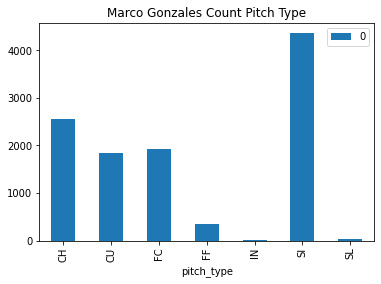

In [30]:
pitch_buckets = df.groupby(["pitch_type"]).size().reset_index().set_index("pitch_type")
ax = pitch_buckets.plot(kind='bar')
ax.set_title("Marco Gonzales Count Pitch Type")

In [31]:
df.insert(0, 'ID', range(0, len(df)))
df['ID'] = (df['ID']-len(df['ID']))*-1

ValueError: ignored

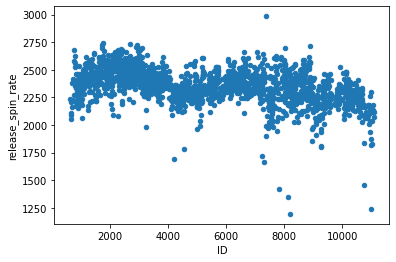

In [32]:
CurveBalls = df[df['pitch_type'] == "CU"]
CurveBalls.plot.scatter(x='ID', y='release_spin_rate')

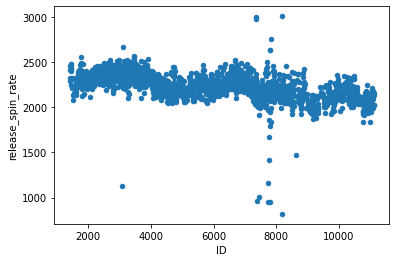

In [33]:
Cutter = df[df['pitch_type'] == "FC"]
Cutter.plot.scatter(x='ID', y='release_spin_rate')

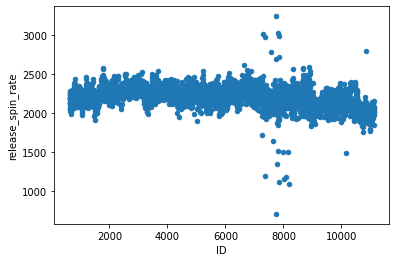

In [34]:
Sinker = df[df['pitch_type'] == "SI"]
Sinker.plot.scatter(x='ID', y='release_spin_rate')

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [75]:
#clean up CurveBalls data of Nan values in the spin rate and speed cols
CurveBalls = CurveBalls.dropna(subset=['release_spin_rate', 'release_speed'])


In [60]:
model.fit(X=CurveBalls[['release_spin_rate']].dropna(), y= CurveBalls['release_speed'].dropna())

LinearRegression()

In [61]:
model.coef_

array([0.00539121])

In [62]:
model.intercept_

64.0167361354284

In [63]:
model.predict([[2500]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([77.49475682])

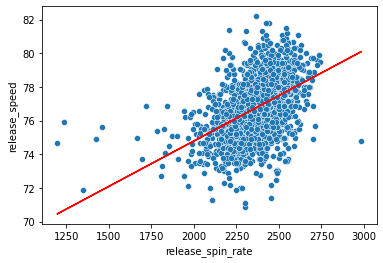

In [74]:
predicted_speed = model.predict(CurveBalls[['release_spin_rate']])
sns.scatterplot(x='release_spin_rate', y = 'release_speed', data=CurveBalls)
plt.plot(CurveBalls['release_spin_rate'], predicted_speed, color='r')

In [95]:
strike_Curve = CurveBalls[CurveBalls['type'] == 'S'] 
np.mean(strike_Curve['release_speed'])

76.73286713286718

In [100]:
non_strike_Curve = CurveBalls[CurveBalls['type'] != 'S'] 
np.mean(non_strike_Curve['release_speed'])

76.71216069489688

In [97]:
strike_Curve = CurveBalls[CurveBalls['type'] == 'S'] 
np.mean(strike_Curve['release_spin_rate'])

2365.511655011655

In [98]:
non_strike_Curve = CurveBalls[CurveBalls['type'] != 'S'] 
np.mean(non_strike_Curve['release_spin_rate'])

2348.473398479913

In [101]:
hit_Curve = CurveBalls[CurveBalls['type'] == 'X'] 
np.mean(hit_Curve['release_spin_rate'])

2341.4985163204747

In [104]:
hit_Curve = hit_Curve.dropna(subset=['launch_angle'])
spin_rate_vs_launch_angle_model = LinearRegression()
spin_rate_vs_launch_angle_model.fit(X= hit_Curve[['release_spin_rate']], y=hit_Curve['launch_angle'])

LinearRegression()

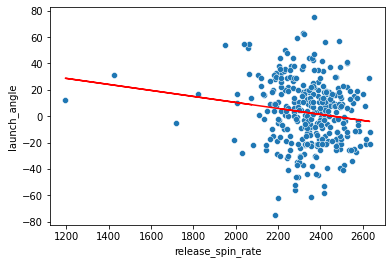

In [106]:
predicted_launch_angle = spin_rate_vs_launch_angle_model.predict(hit_Curve[['release_spin_rate']])
sns.scatterplot(x='release_spin_rate', y='launch_angle', data=hit_Curve)
plt.plot(hit_Curve['release_spin_rate'], predicted_launch_angle, color='r')

In [109]:
hits = df[df['type']=='X']
hits = hits.dropna(subset=['launch_speed', 'launch_angle'])
release_speed_vs_launch_speed_model = LinearRegression()
release_speed_vs_launch_speed_model.fit(X=hits[['release_speed']], y=hits['launch_speed'])

LinearRegression()

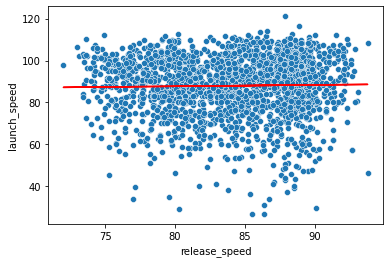

In [117]:
prediction_launch_speed = release_speed_vs_launch_speed_model.predict(hits[['release_speed']])
sns.scatterplot(x='release_speed', y ='launch_speed', data= hits)
plt.plot(hits['release_speed'], prediction_launch_speed, color = 'r')

In [116]:
desired_columns = ['release_speed', 'launch_angle']
model_many = LinearRegression()
model_many.fit(X=hits[desired_columns], y=hits['launch_speed'])

LinearRegression()

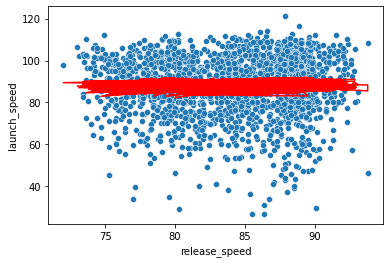

In [114]:
predicted_launch_speed_many = model_many.predict(hits[['release_speed', 'launch_angle']])
sns.scatterplot(x='release_speed', y='launch_speed', data=hits)
plt.plot(hits['release_speed'], predicted_launch_speed_many, color = 'r')